In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/CampusUser/Anaconda3/train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unnamed: 13
0,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N,NaN
1,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y,NaN
2,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,NaN
3,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,NaN
4,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y,NaN


We found a few problems in the data set, which needs to be solved before the data is ready for a good model.
There are missing values in some variables that need to be estimated wisely depending on the amount of missing values and the expected importance of variables.
While looking at the distributions, ApplicantIncome and LoanAmount seemed to contain extreme values at either end which needs to be treated appropriately.

In [3]:
def num_missing(x):
    return sum(x.isnull())
print ("missing values for column is:")
print (df.apply(num_missing, axis=0))

missing values for column is:
Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
Unnamed: 13          611
dtype: int64


In [4]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
# There are numerous ways to fill the missing values of loan amount – the simplest being replacement by mean, 

In [5]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [6]:
df['Self_Employed'].fillna('No', inplace=True)

# Since around 86% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success

LoanAmounts with extreme values are practically possible,
So instead of treating them as outliers, let’s try a log transformation to nullify their effect

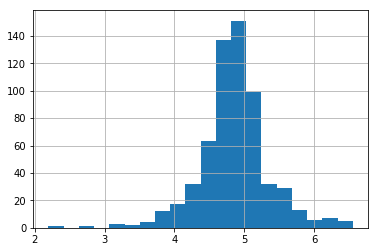

In [7]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [8]:
df['TotalAmount']=df['ApplicantIncome']+df['CoapplicantIncome']

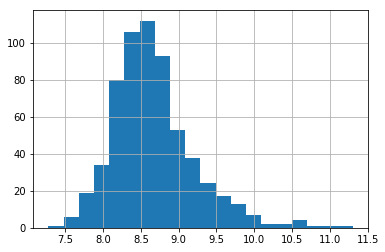

In [9]:
df['TotalAmount_log']=np.log(df['TotalAmount'])
df['TotalAmount_log'].hist(bins=20)

Now we see that the distribution is much better than before and data is ready for modeling,